<a href="https://colab.research.google.com/github/priratec/Neural-Network-Project/blob/main/Healthcare_Diabetes_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Classification Model:

## Goal:
Build a classification model to predict whether a person has diabetes based on their health metrics.

### Steps:


1. Preprocess the data (handle missing values, normalize features).

2. Split the data into training and testing sets.

3. Train a classifier (e.g., Logistic Regression, Decision Tree, Random Forest, KNN).

4. Evaluate the model's performance using metrics like accuracy, precision, recall, and F1 score.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import math

In [6]:
#load data
df = pd.read_csv('/content/drive/MyDrive/Healthcare Diabetes.csv')

In [7]:
# Data EDA Function
print("First 5 Rows of the DataFrame:")
print(df.head(5))
print("\nLast 5 Rows of the DataFrame:")
print(df.tail(5))
print("\nShape of the DataFrame:")
print(df.shape)



First 5 Rows of the DataFrame:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Last 5 Rows of the DataFrame:
        Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72        

In [8]:
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])
else:
  print("No 'ID' column found in the DataFrame.")

print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [10]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


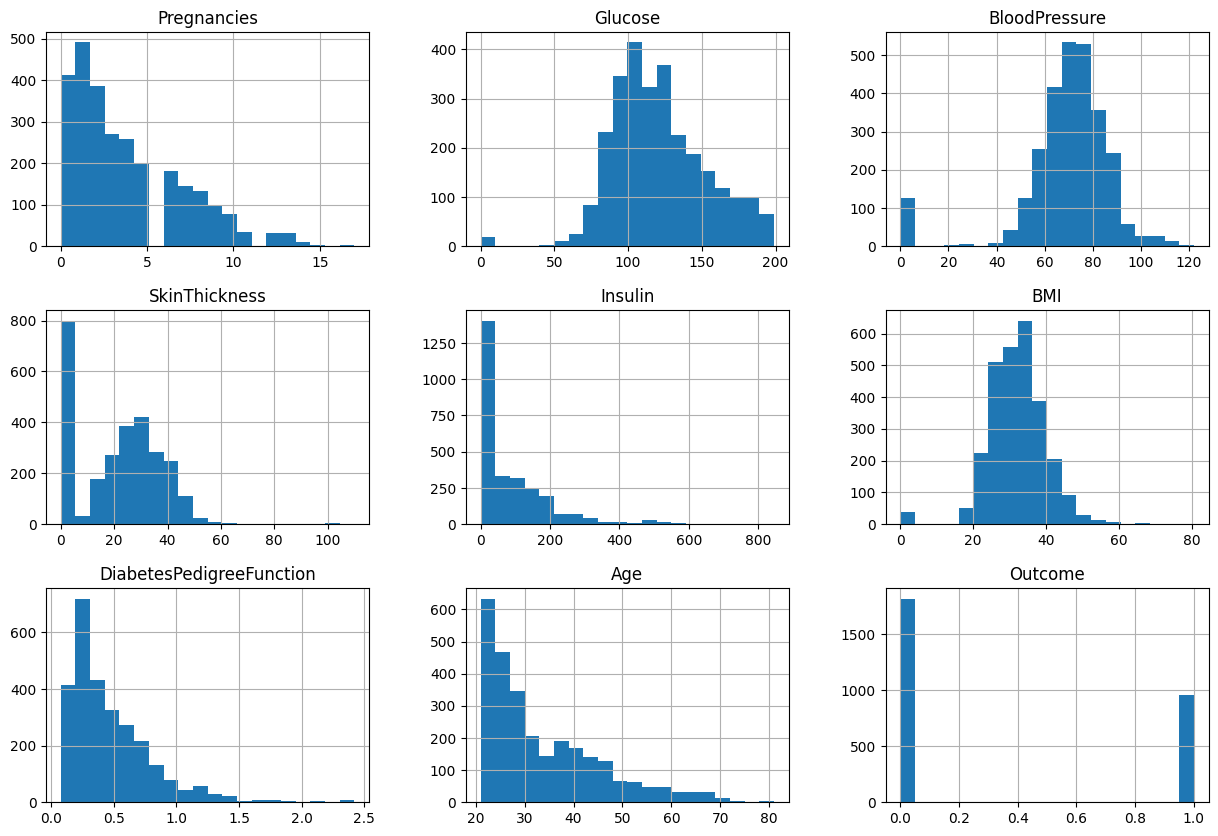

Exception ignored in: <function _xla_gc_callback at 0x78ced25818a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


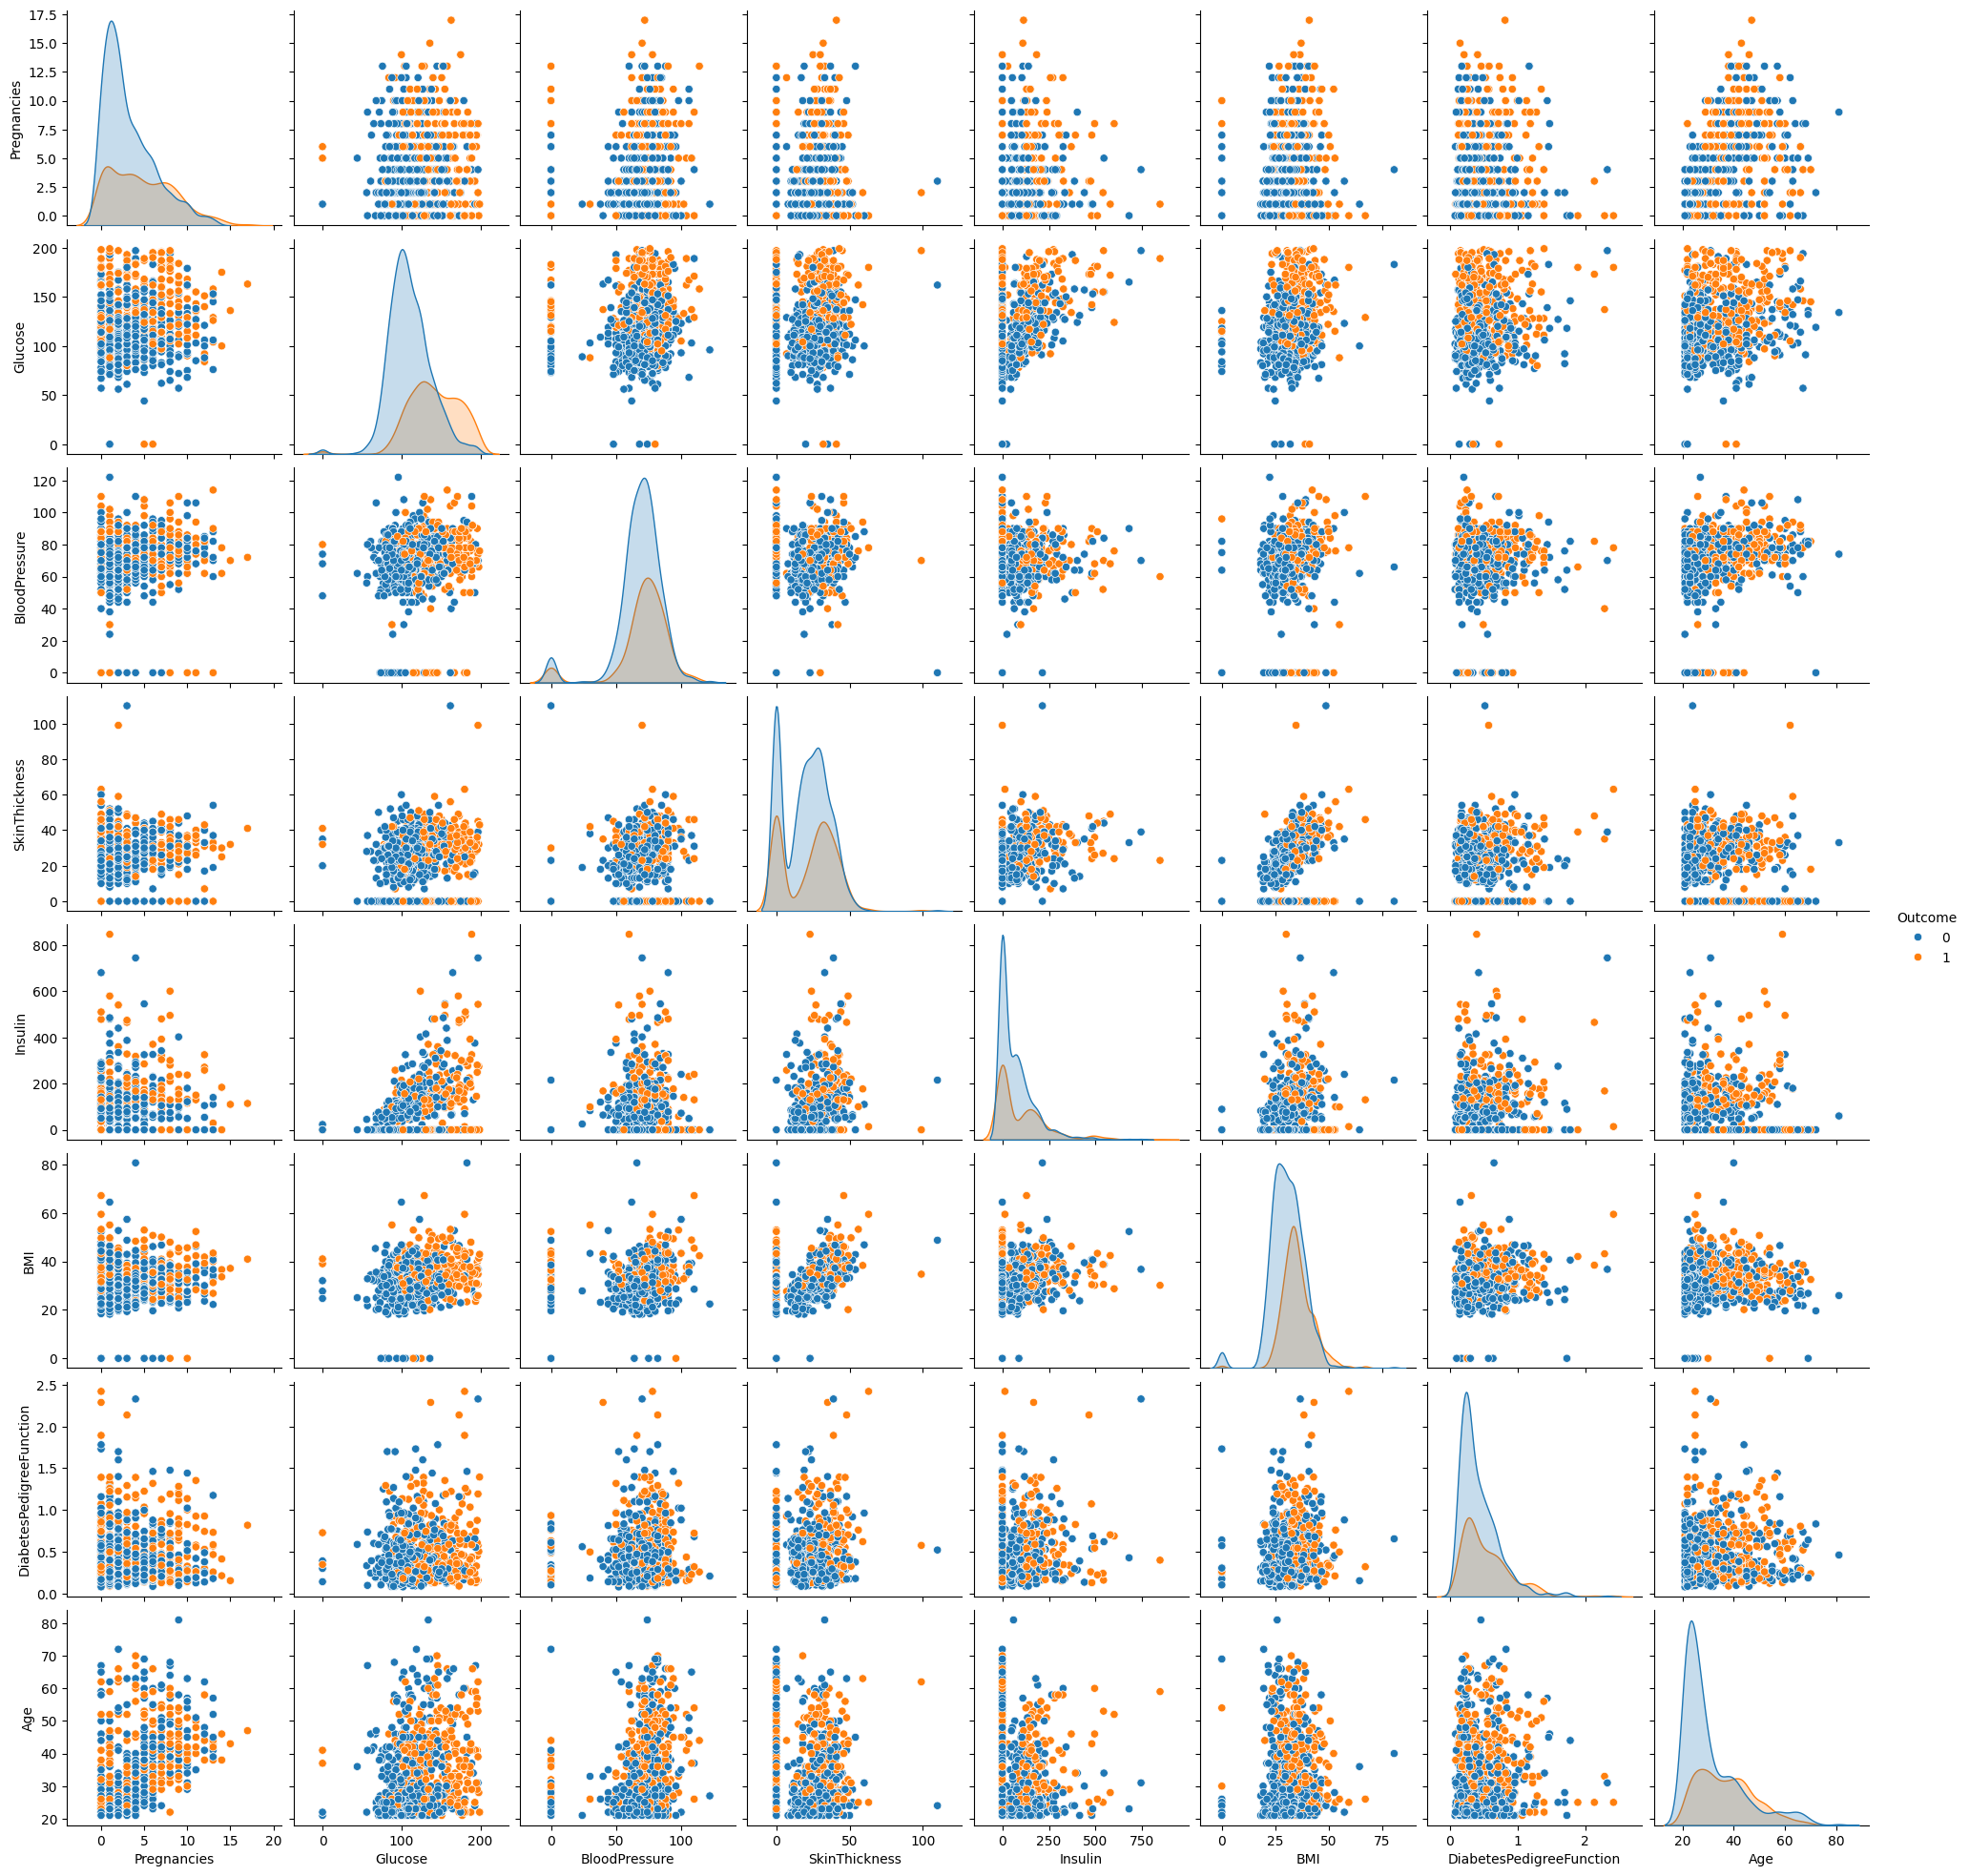

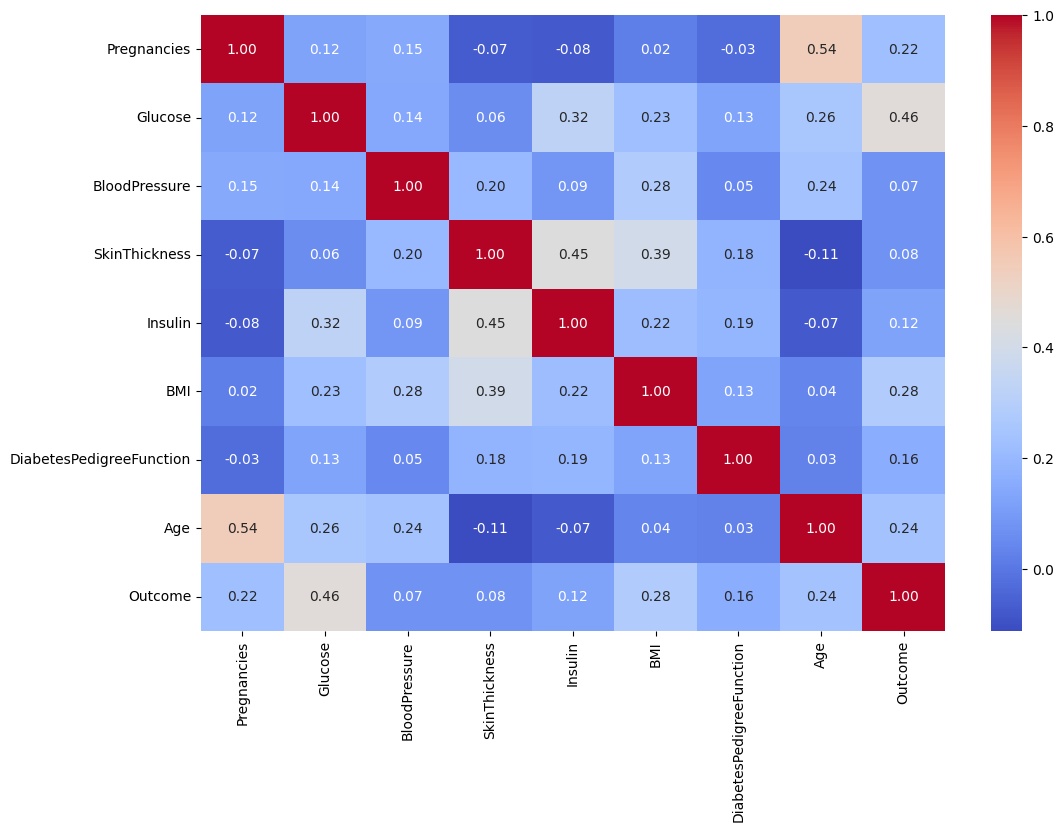

In [11]:
# Visualize the distribution of each feature
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Pairplot to see relationships between features and target
sns.pairplot(df, hue='Outcome')  # Assuming 'Outcome' is your target variable
plt.show()

# Correlation heatmap to see correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


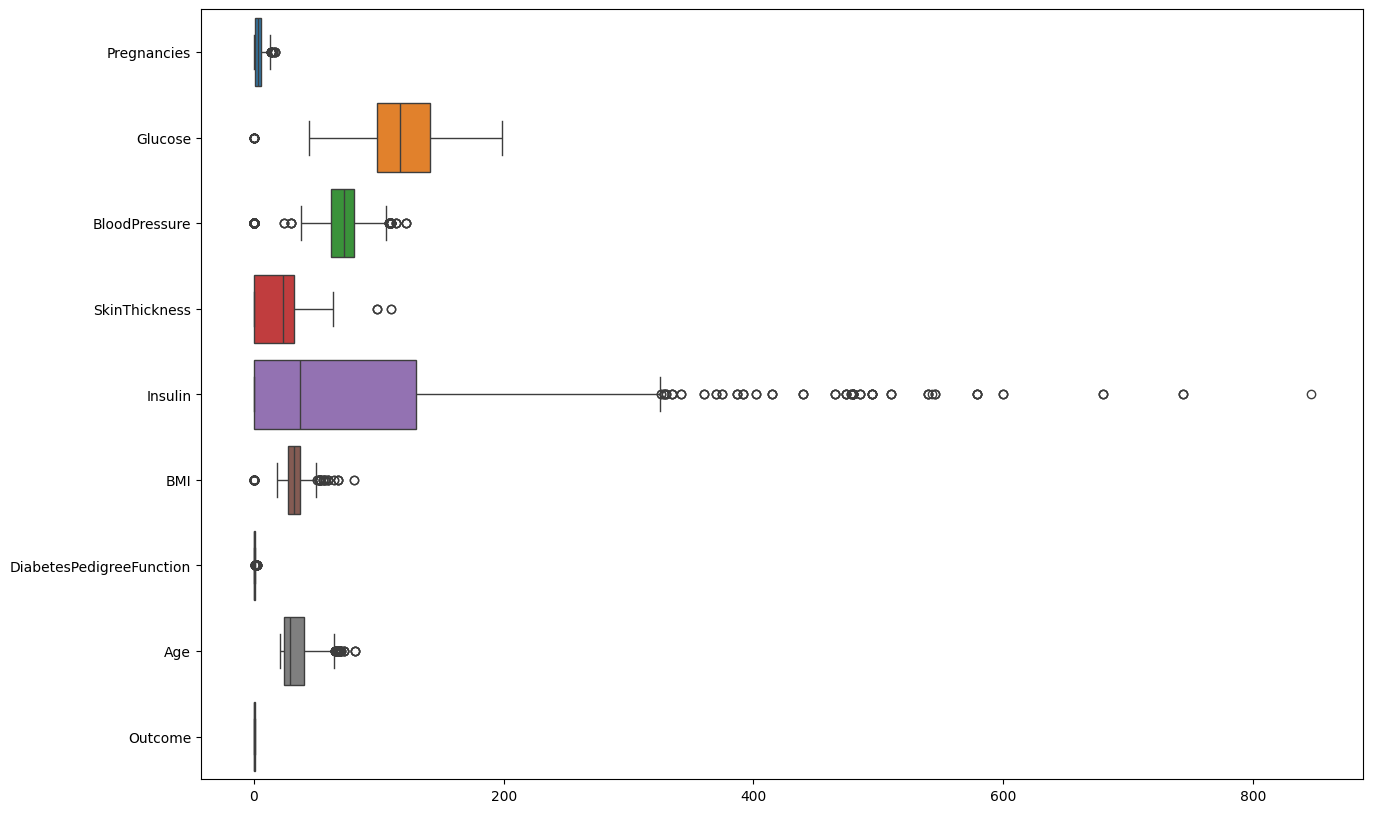

In [177]:
# Boxplot for each feature to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.show()


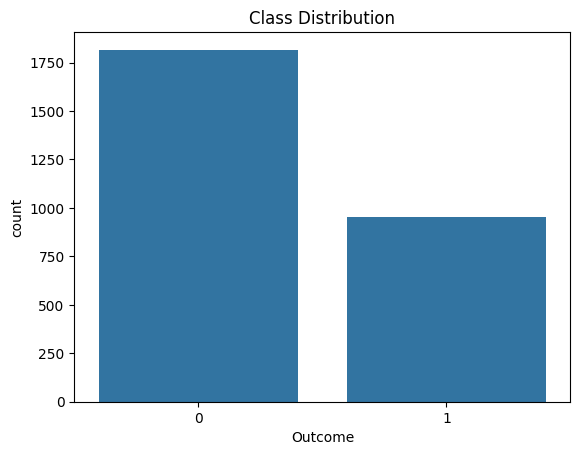

In [178]:
# Bar plot to show class distribution
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.show()


Building deep neural network model

In [12]:
# Define features (X) and target (y)
X = df.drop(columns=['Outcome'])  # Features are all columns except 'Outcome'
y = df['Outcome']                 # Target variable is the 'Outcome' column


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Feature Selection (Chọn 5 features quan trọng nhất)
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)
# Use X_train and y_train for feature selection
X_train = selector.fit_transform(X_train, y_train)
# The selected features will be in X_train, and X_test needs to be transformed as well
X_test = selector.transform(X_test)

In [17]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale dữ liệu trước khi dùng SMOTE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng Borderline-SMOTE trước
borderline_smote = BorderlineSMOTE(sampling_strategy=0.8, kind='borderline-1', random_state=42)
X_borderline, y_borderline = borderline_smote.fit_resample(X_scaled, y)

# Áp dụng SMOTE tiếp để tăng dữ liệu
smote = SMOTE(sampling_strategy=0.85, random_state=42)
X_smote, y_smote = smote.fit_resample(X_borderline, y_borderline)

# Thêm noise nhẹ vào dữ liệu SMOTE
def add_noise(X, noise_level=0.02):  # Tăng noise lên một chút để có hiệu quả tốt hơn
    noise = np.random.normal(0, noise_level, X.shape) # Added indentation here
    return X + noise # Added indentation here

X_noise = add_noise(X_smote, noise_level=0.02)

# Kết hợp dữ liệu gốc, SMOTE và dữ liệu có noise
X_final = np.vstack((X_smote, X_noise))
y_final = np.hstack((y_smote, y_smote))  # Nhân đôi nhãn

# Kiểm tra lại số lượng mẫu
print("Original dataset:", X.shape)
print("After Borderline-SMOTE + SMOTE + Noise:", X_final.shape)

Original dataset: (2768, 8)
After Borderline-SMOTE + SMOTE + Noise: (6718, 8)


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW

# Khởi tạo model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input có 8 feature
    Dense(1028, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(1, activation='sigmoid')  # Output binary
])

#Optimizer
optimizer = 'AdamW'
# Compile model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])




In [66]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

# Hyperparameters
max_lr = 3e-3      # Tăng max_lr để mô hình học tốt hơn
min_lr = 1e-8    # Giảm min_lr để LR có thể giảm sâu hơn
warmup_epochs = 10
total_epochs = 230

# Define warm-up + cosine decay scheduler
def scheduler(epoch, lr):
    if epoch < warmup_epochs:
        return min_lr + (max_lr - min_lr) * (epoch / warmup_epochs)
    else:
        return min_lr + (max_lr - min_lr) * (1 + np.cos(np.pi * (epoch - warmup_epochs) / (total_epochs - warmup_epochs))) / 2

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, min_lr=5e-7)  # Điều chỉnh factor và patience

# Define class weight
class_weight = {0: 1, 1: 1.5}

# Train model
history = model.fit(
    X_train, y_train,
    epochs=total_epochs,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler, lr_reducer],
    class_weight=class_weight
)


Epoch 1/230
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - binary_accuracy: 0.3969 - loss: 1.3611 - val_binary_accuracy: 0.2888 - val_loss: 0.7152 - learning_rate: 1.0000e-08
Epoch 2/230
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.6880 - loss: 1.1044 - val_binary_accuracy: 0.7744 - val_loss: 0.6041 - learning_rate: 3.0001e-04
Epoch 3/230
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.7446 - loss: 0.6539 - val_binary_accuracy: 0.7798 - val_loss: 0.5428 - learning_rate: 6.0001e-04
Epoch 4/230
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.7682 - loss: 0.6174 - val_binary_accuracy: 0.8032 - val_loss: 0.4888 - learning_rate: 9.0001e-04
Epoch 5/230
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - binary_accuracy: 0.7509 - loss: 0.6291 - val_binary_accuracy: 0.7924 - val_loss: 0.4591 - learning_rate: 0.0012
Epoch 6/230
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - binary_accuracy: 0.7722 - loss: 0.5675 - val_binary_accuracy: 0.7816 - val_loss: 0.4716 - learning_r

18/18 - 0s - 5ms/step - binary_accuracy: 0.9801 - loss: 0.0741
Test Accuracy: 98.01%
Test Loss: 0.0741


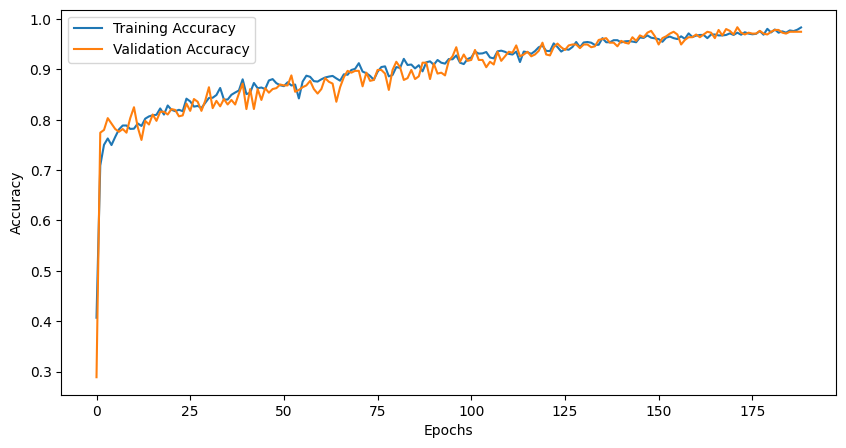

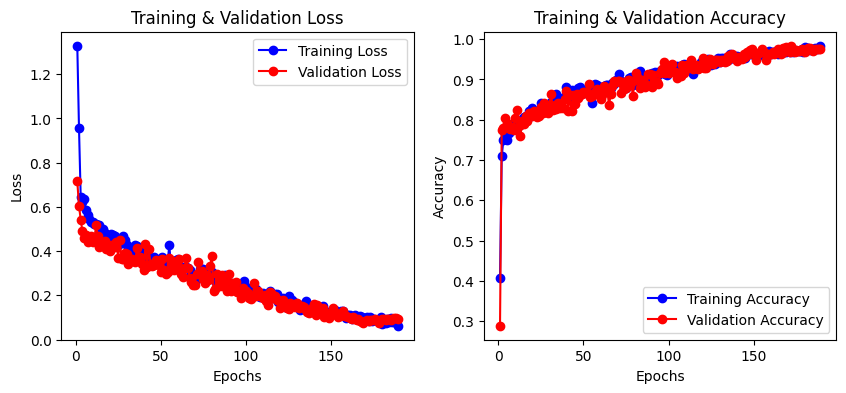

In [68]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy:.2%}')
print(f"Test Loss: {test_loss:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Lấy dữ liệu từ history
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']  # Nếu dùng binary classification

epochs = range(1, len(train_loss) + 1)

# Vẽ Loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Vẽ Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()



In [82]:
model.save("/content/drive/MyDrive/classification Project/diabetes_model.keras")

print(f"Model saved at: {model_path}")


Model saved at: /content/drive/MyDrive/classification Project/diabetes_model.h5


In [97]:
# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.55).astype("int32")

# Evaluate performance using other metrics
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))





18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       367
           1       0.98      0.98      0.98       187

    accuracy                           0.99       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.99      0.99      0.99       554

Confusion Matrix:
 [[363   4]
 [  4 183]]
